In [1]:
#importing all the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

## Data Preparation:

In [2]:
#opening the csv file and going through it:
data=pd.read_csv('/Users/rishismac/Desktop/day.csv',index_col='instant')
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#checking the shape of the data:
data.shape

(730, 15)

In [4]:
#checking summary of the data:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [5]:
#checking the statistics of the numerical data:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
data=data.drop(['casual','registered'],axis=1)
data

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341


In [7]:
#setting the categorical and numerical variables:
num_variables=['temp','atemp','hum','windspeed','cnt']
cat_variables=['season','yr','mnth','holiday','weekday','workingday','weathersit']


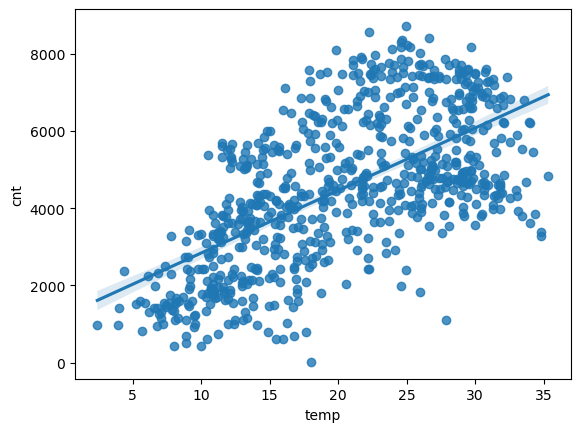

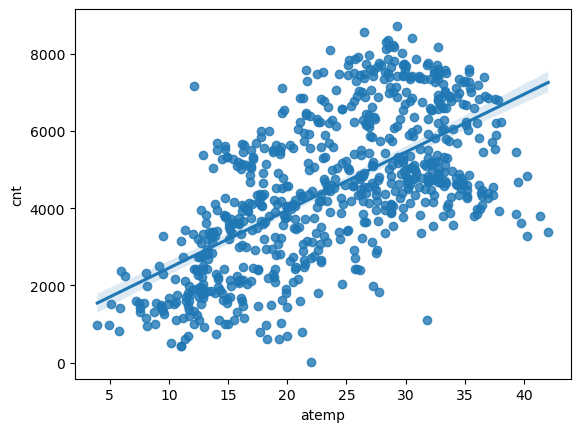

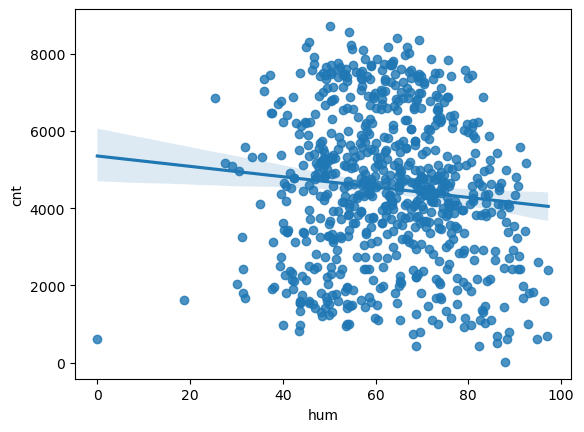

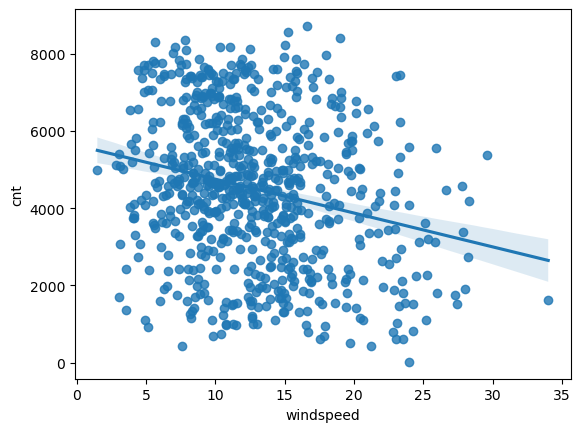

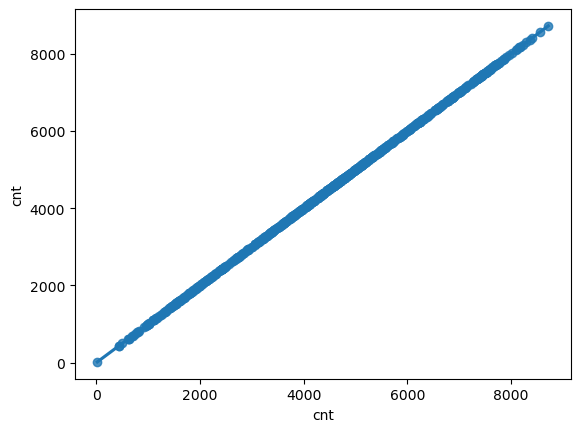

In [8]:
#visualizing the numerical dara:
for i in num_variables:
    sns.regplot(x=i,y='cnt',data=data)
    plt.show()

## Categorical Variables:

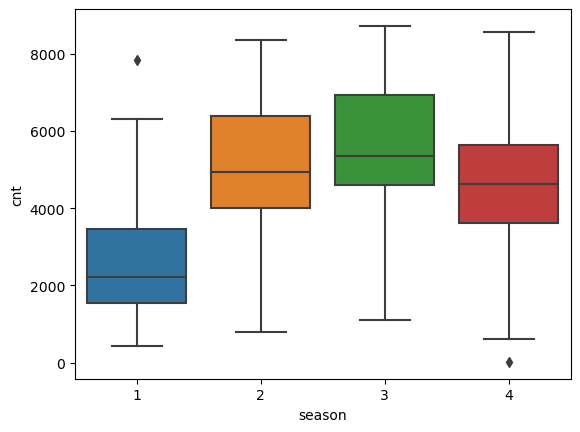

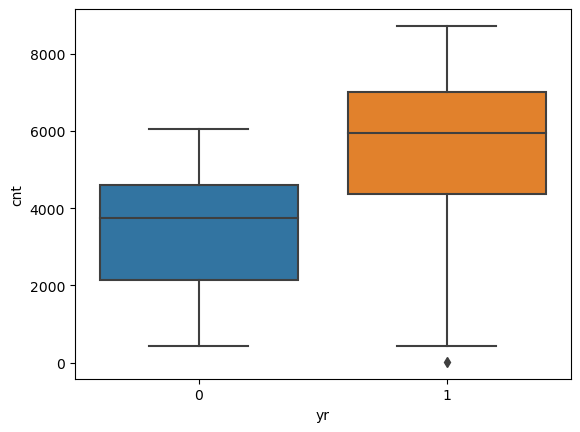

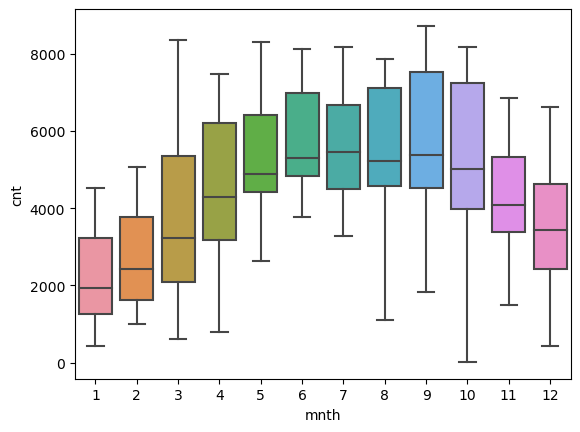

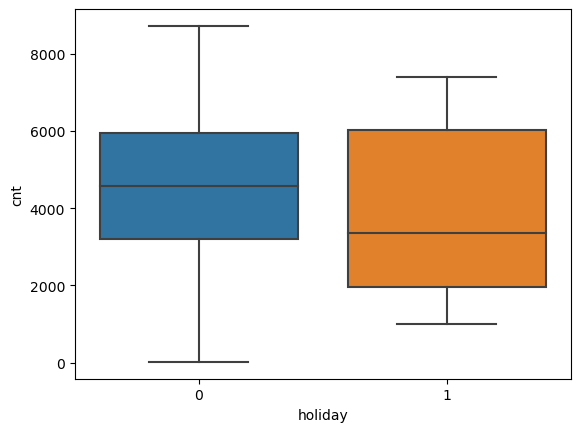

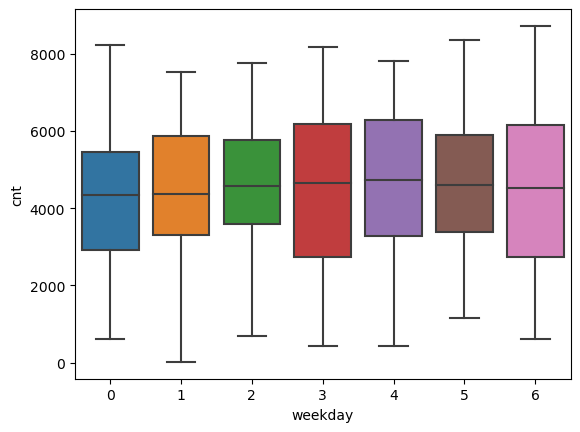

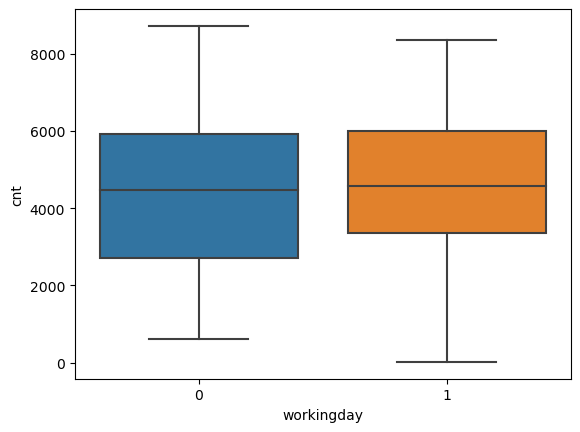

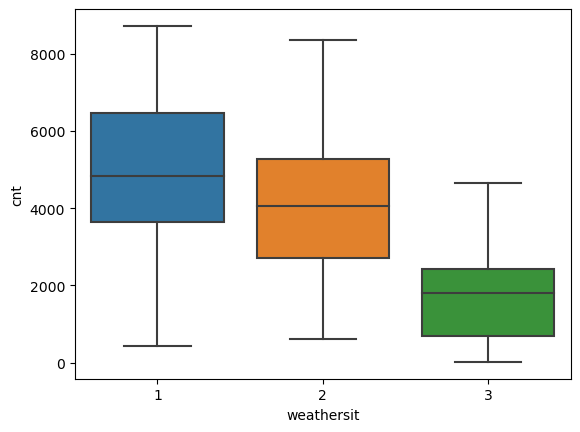

In [9]:
#checking the boxplot of target variable with the categorical variables:
for i in cat_variables:
    sns.boxplot(x=i,y='cnt',data=data)
    plt.show()

## Bivariate Analysis:

<Axes: >

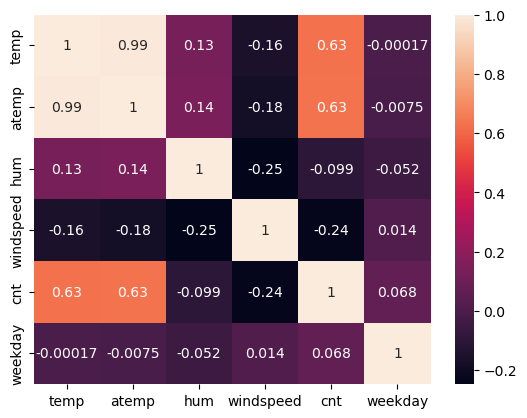

In [10]:
#Checking the heatmap of correlation between different numerical variables:

sns.heatmap(data[num_variables+['weekday']].corr(),annot=True)

In [11]:
#it is evident from heatmap that temp and atemp have very high correlation,hence we can drop one of them:
data=data.drop('temp',axis=1)


In [12]:
data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [13]:
num_variables.remove('temp')

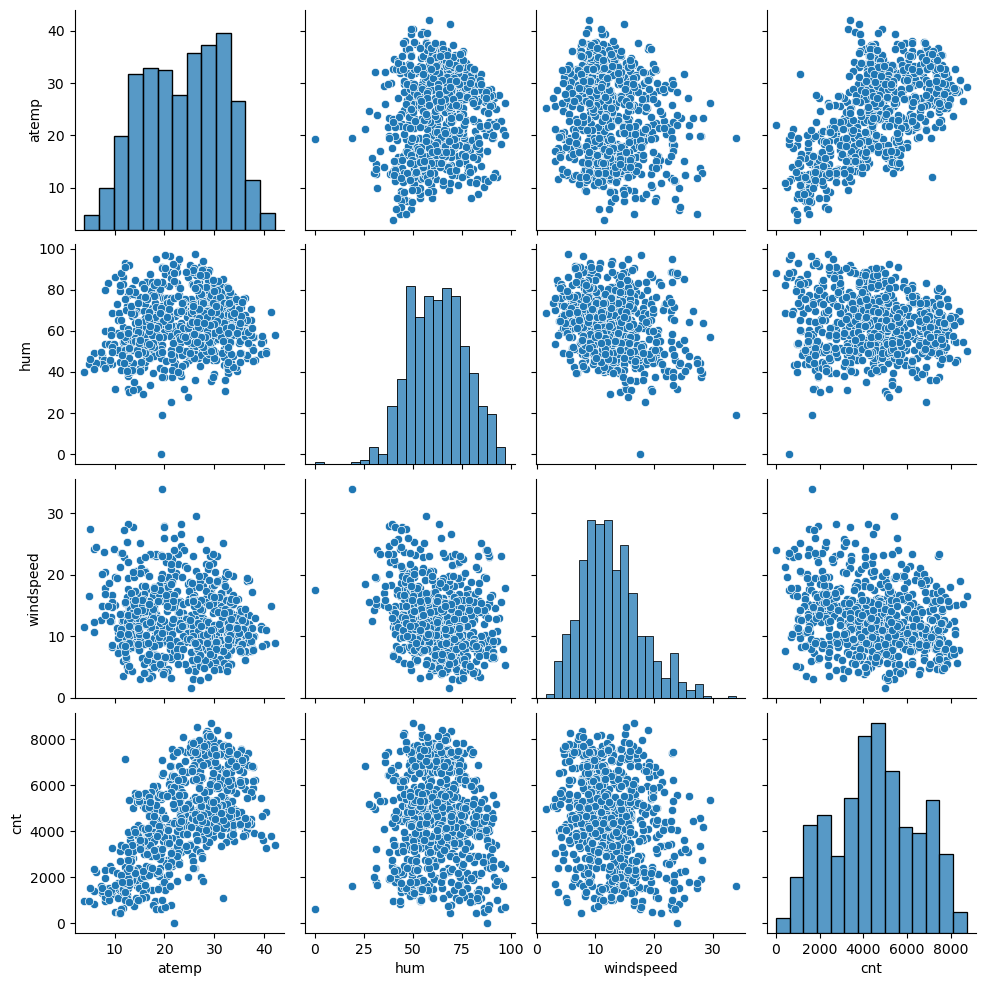

In [14]:
#Checking the pairplots for overall relation between different variables:
sns.pairplot(data[num_variables])
plt.show()


In [15]:
cat_variables


['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

## Data Cleaning and Imputation for ease of analysis and model building:

In [16]:
#Mapping the different numeric values to their actual variable names:

data['season']=data['season'].map({1:'spring',2:'summer', 3:'fall', 4:'winter'})

data['weathersit']=data['weathersit'].map({1: 'Clear',2: 'Mist',3:'Light Rain',4: 'Heavy Rain'})

data['mnth']=data['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'sep'
                              ,10:'Oct',11:'Nov',12:'Dec'})

data['weekday']=data['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})

In [17]:

data['weathersit'].unique()

array(['Mist', 'Clear', 'Light Rain'], dtype=object)

In [18]:
data['weekday'].unique()

array(['Sun', 'Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat'], dtype=object)

In [19]:
#creating list of columns for whom dummy variables are required:

dummy=['season','weathersit','mnth','weekday']

In [20]:
#creating dummy variables for all categorical variables:

for i in dummy:
    dummy1=pd.get_dummies(data[i],drop_first=True,dtype=float)
    data=pd.concat([data,dummy1],axis=1)
    data=data.drop(i,axis=1)


In [21]:
# Channging the name of column for better understanding:\

data['year_of_operation']=data['yr']


In [22]:
data=data.drop('yr',axis=1)


In [23]:
data

,dteday,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Nov,Oct,sep,Mon,Sat,Sun,Thurs,Tue,Wed,year_of_operation
instant,,,,,,,,,,,,,,,,,,,,,
1,01-01-2018,0,0,18.18125,80.5833,10.749882,985,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,02-01-2018,0,0,17.68695,69.6087,16.652113,801,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,03-01-2018,0,1,9.47025,43.7273,16.636703,1349,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,04-01-2018,0,1,10.60610,59.0435,10.739832,1562,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
5,05-01-2018,0,1,11.46350,43.6957,12.522300,1600,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,0,1,11.33210,65.2917,23.458911,2114,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
727,28-12-2019,0,1,12.75230,59.0000,10.416557,3095,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
728,29-12-2019,0,0,12.12000,75.2917,8.333661,1341,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [24]:
#dropping the unwanted columns as they dont help in finding any insights:

data=data.drop('dteday',axis=1)
data

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,Light Rain,...,Nov,Oct,sep,Mon,Sat,Sun,Thurs,Tue,Wed,year_of_operation
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,18.18125,80.5833,10.749882,985,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0,0,17.68695,69.6087,16.652113,801,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,0,1,9.47025,43.7273,16.636703,1349,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0,1,10.60610,59.0435,10.739832,1562,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
5,0,1,11.46350,43.6957,12.522300,1600,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0,1,11.33210,65.2917,23.458911,2114,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
727,0,1,12.75230,59.0000,10.416557,3095,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
728,0,0,12.12000,75.2917,8.333661,1341,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [25]:
data.columns

Index(['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'Light Rain', 'Mist', 'Aug', 'Dec', 'Feb', 'Jan',
       'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'sep', 'Mon', 'Sat', 'Sun',
       'Thurs', 'Tue', 'Wed', 'year_of_operation'],
      dtype='object')

In [26]:
#adding the newly created variable to numerical variables:
num_variables.append('year_of_operation')

num_variables

['atemp', 'hum', 'windspeed', 'cnt', 'year_of_operation']

## Model Building:

In [27]:
#Splitting the data into test and train data:

df_train,df_test=train_test_split(data,train_size=0.7,random_state=100)

# removing 'cnt' from list of numerical variables:
num_variables.remove('cnt')

In [28]:
#creating the predictor variable and target variable dataframe of training data:
y_train=df_train.pop('cnt')
X_train=df_train


In [29]:
#Scaling the data for efficient convergence of model as well predicting the significance of variables:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[num_variables]=scaler.fit_transform(X_train[num_variables])
X_train

,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light Rain,Mist,...,Nov,Oct,sep,Mon,Sat,Sun,Thurs,Tue,Wed,year_of_operation
instant,,,,,,,,,,,,,,,,,,,,,
577,0,1,0.766351,0.725633,0.264686,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
427,0,0,0.438975,0.640189,0.255342,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
729,0,0,0.200348,0.498067,0.663106,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
483,0,0,0.391735,0.504508,0.188475,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
112,0,1,0.318819,0.751824,0.380981,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0,1,0.824359,0.679690,0.187140,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
54,0,1,0.218747,0.435939,0.111379,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
351,0,0,0.223544,0.577930,0.431816,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<Axes: >

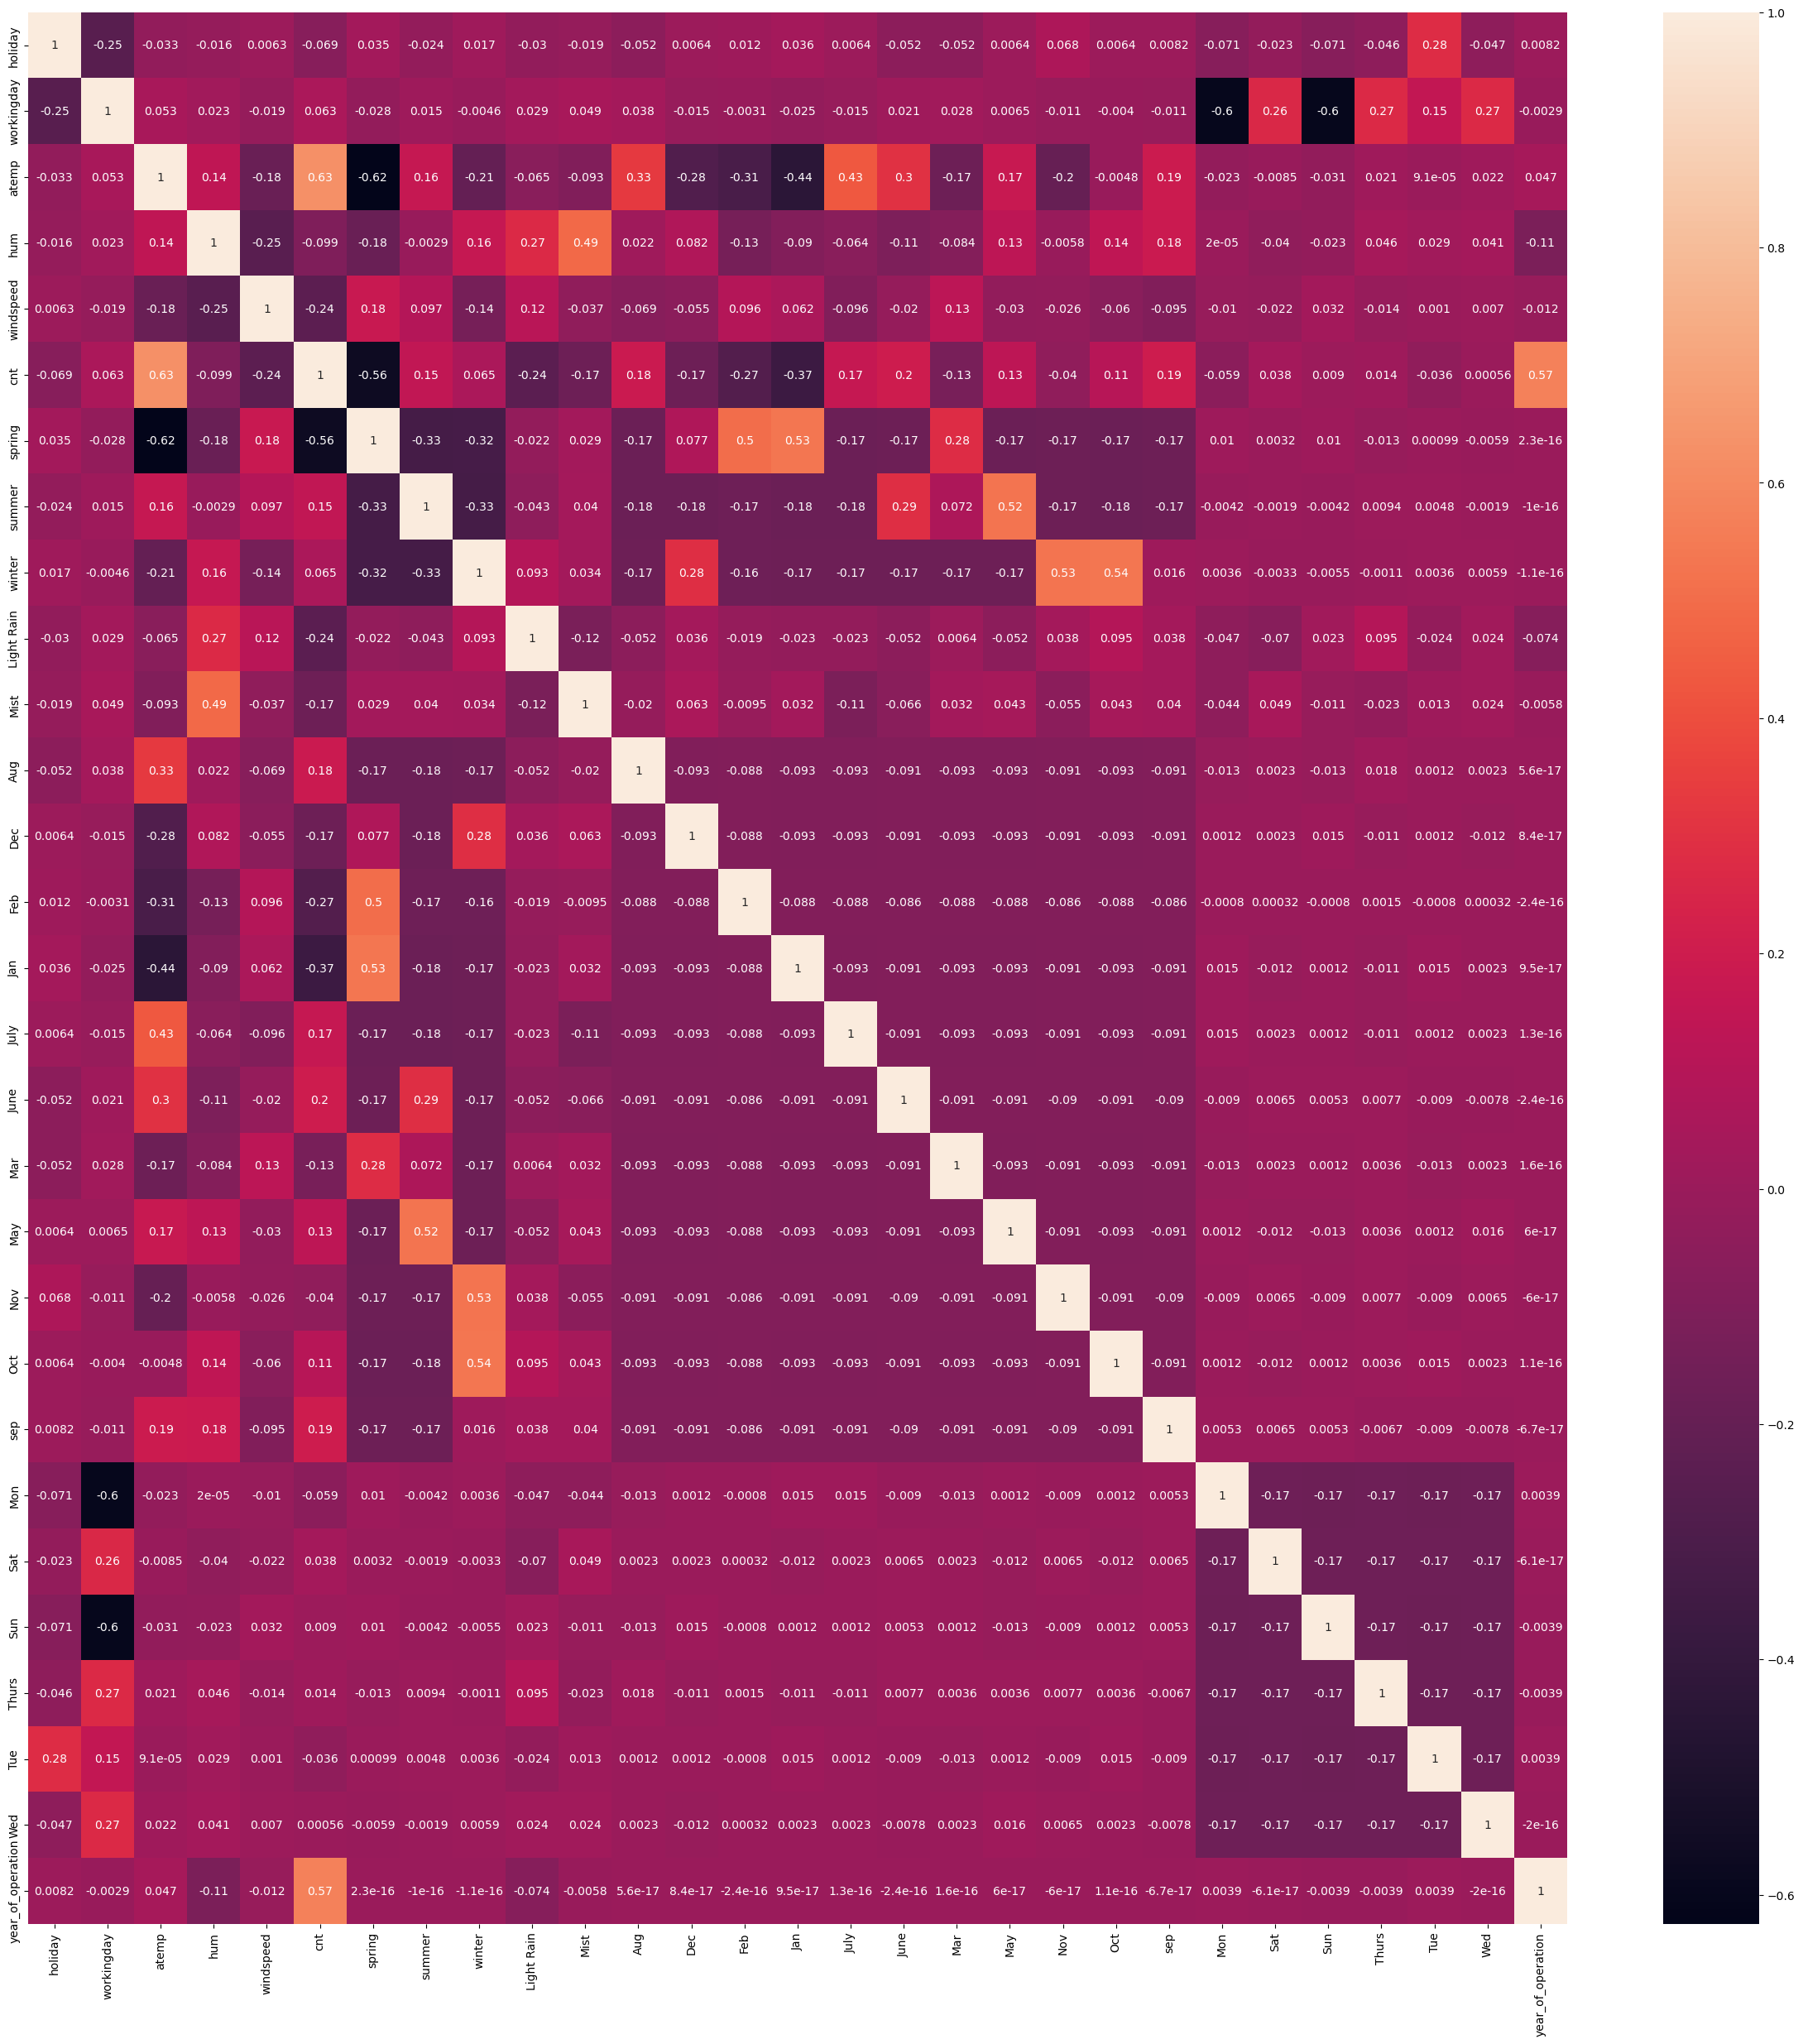

In [30]:
#Checking the heatmap to select important variables to decide on the model:

plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True)

## Based on heatmap deciding on variables of interest:

In [31]:
col_interest=['atemp','year_of_operation','sep','oct','windspeed','Light Rain']

## Model 1: 
### Taking 'atemp' as a variable and checking on the model summary: 

In [32]:
model=X_train['atemp']
model_sm=sm.add_constant(model)
lr1=sm.OLS(y_train,model_sm)
lr_model=lr1.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           4.77e-62
Time:                        18:46:53   Log-Likelihood:                -4448.0
No. Observations:                 510   AIC:                             8900.
Df Residuals:                     508   BIC:                             8909.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1431.8488    172.338      8.308      0.000    1093.265    1770.433
atemp       5950.4044    310.351     19.173      0.000    5340.674    6560.135
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.759
Skew:                           0.081   Prob(JB):                        0.252
Kurtosis:                       2.678   Cond. No.                         6.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 2: 
### Adding 'year_of_operation to check its affect on adjusted R^2:

In [33]:
model=X_train[['atemp','year_of_operation']]
model_sm=sm.add_constant(model)
lr1=sm.OLS(y_train,model_sm)
lr_model=lr1.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     582.7
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          3.98e-132
Time:                        18:46:53   Log-Likelihood:                -4282.5
No. Observations:                 510   AIC:                             8571.
Df Residuals:                     507   BIC:                             8584.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               645.9757    129.934      4.972      0.000     390.701     901.251
atemp              5440.2086    225.808     24.092      0.000    4996.574    5883.843
year_of_operation  2063.0058     95.845     21.524      0.000    1874.703    2251.309
==============================================================================
Omnibus:                       38.998   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.230
Skew:                          -0.546   Prob(JB):                     8.34e-14
Kurtosis:                       4.281   Cond. No.                         6.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=model.columns
vif['vif']=[variance_inflation_factor(model.values,i) for i in range(model.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
0,atemp,1.89
1,year_of_operation,1.89


## Model 3:
### Adding 'sep' and 'windspeed' :

In [35]:
model=X_train[['atemp','year_of_operation','sep','windspeed']]
model_sm=sm.add_constant(model)
lr1=sm.OLS(y_train,model_sm)
lr_model=lr1.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     321.8
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          2.30e-137
Time:                        18:46:53   Log-Likelihood:                -4263.9
No. Observations:                 510   AIC:                             8538.
Df Residuals:                     505   BIC:                             8559.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1258.8905    168.827      7.457      0.000     927.201    1590.580
atemp              5052.3006    227.395     22.218      0.000    4605.544    5499.057
year_of_operation  2079.3550     92.626     22.449      0.000    1897.375    2261.335
sep                 513.6082    173.607      2.958      0.003     172.527     854.689
windspeed         -1444.2952    278.847     -5.180      0.000   -1992.139    -896.452
==============================================================================
Omnibus:                       34.163   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.310
Skew:                          -0.530   Prob(JB):                     5.33e-11
Kurtosis:                       4.050   Cond. No.                         9.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=model.columns
vif['vif']=[variance_inflation_factor(model.values,i) for i in range(model.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
0,atemp,3.30
3,windspeed,2.69
1,year_of_operation,1.98
2,sep,1.14


## Model 4:
### Adding 'Light Rain' and 'Oct':

In [37]:
model=X_train[['atemp','year_of_operation','sep','windspeed','Light Rain','Oct']]
model_sm=sm.add_constant(model)
lr1=sm.OLS(y_train,model_sm)
lr_model=lr1.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     259.1
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          2.47e-150
Time:                        18:46:53   Log-Likelihood:                -4227.6
No. Observations:                 510   AIC:                             8469.
Df Residuals:                     503   BIC:                             8499.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1224.1016    158.455      7.725      0.000     912.786    1535.417
atemp              4991.0250    212.335     23.505      0.000    4573.852    5408.198
year_of_operation  2049.8124     86.602     23.669      0.000    1879.666    2219.959
sep                 652.2422    163.078      4.000      0.000     331.845     972.640
windspeed         -1230.6323    261.393     -4.708      0.000   -1744.189    -717.075
Light Rain        -2087.4839    259.522     -8.044      0.000   -2597.364   -1577.604
Oct                 746.3379    157.460      4.740      0.000     436.977    1055.699
==============================================================================
Omnibus:                       31.489   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.353
Skew:                          -0.518   Prob(JB):                     1.05e-09
Kurtosis:                       3.934   Cond. No.                         9.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=model.columns
vif['vif']=[variance_inflation_factor(model.values,i) for i in range(model.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
0,atemp,3.36
3,windspeed,2.74
1,year_of_operation,1.98
2,sep,1.16
5,Oct,1.12
4,Light Rain,1.07


## Model 5: Adding 'summer' and 'mist':

In [39]:
model=X_train[['atemp','year_of_operation','sep','windspeed','Light Rain','Oct','summer','Mist']]
model_sm=sm.add_constant(model)
lr1=sm.OLS(y_train,model_sm)
lr_model=lr1.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     237.3
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          5.27e-165
Time:                        18:46:53   Log-Likelihood:                -4187.5
No. Observations:                 510   AIC:                             8393.
Df Residuals:                     501   BIC:                             8431.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1568.8358    152.897     10.261      0.000    1268.438    1869.234
atemp              4595.8112    202.420     22.704      0.000    4198.114    4993.508
year_of_operation  2049.2030     80.205     25.550      0.000    1891.624    2206.782
sep                 917.8621    155.168      5.915      0.000     613.001    1222.723
windspeed         -1465.4114    244.326     -5.998      0.000   -1945.441    -985.381
Light Rain        -2332.0702    242.600     -9.613      0.000   -2808.709   -1855.431
Oct                 954.0778    148.842      6.410      0.000     661.645    1246.510
summer              540.0031     98.177      5.500      0.000     347.113     732.893
Mist               -670.4456     85.334     -7.857      0.000    -838.103    -502.788
==============================================================================
Omnibus:                       32.664   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.372
Skew:                          -0.466   Prob(JB):                     6.99e-12
Kurtosis:                       4.245   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=model.columns
vif['vif']=[variance_inflation_factor(model.values,i) for i in range(model.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
0,atemp,3.72
3,windspeed,2.92
1,year_of_operation,1.99
6,summer,1.50
7,Mist,1.46
2,sep,1.22
5,Oct,1.17
4,Light Rain,1.09


## Model 6: Adding 'holiday':

In [41]:
model=X_train[['atemp','year_of_operation','sep','windspeed','Light Rain','Oct','summer','Mist','holiday']]
model_sm=sm.add_constant(model)
lr1=sm.OLS(y_train,model_sm)
lr_model=lr1.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     215.2
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          1.05e-165
Time:                        18:46:53   Log-Likelihood:                -4183.0
No. Observations:                 510   AIC:                             8386.
Df Residuals:                     500   BIC:                             8428.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1614.6523    152.489     10.589      0.000    1315.054    1914.251
atemp              4551.8293    201.392     22.602      0.000    4156.150    4947.508
year_of_operation  2047.0035     79.586     25.721      0.000    1890.640    2203.367
sep                 943.1207    154.198      6.116      0.000     640.165    1246.076
windspeed         -1455.1014    242.455     -6.002      0.000   -1931.458    -978.745
Light Rain        -2362.9705    240.942     -9.807      0.000   -2836.353   -1889.588
Oct                 954.3252    147.688      6.462      0.000     664.160    1244.490
summer              527.8211     97.502      5.413      0.000     336.258     719.384
Mist               -683.2572     84.782     -8.059      0.000    -849.829    -516.685
holiday            -751.2665    252.313     -2.978      0.003   -1246.990    -255.543
==============================================================================
Omnibus:                       30.696   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.374
Skew:                          -0.434   Prob(JB):                     1.90e-11
Kurtosis:                       4.253   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=model.columns
vif['vif']=[variance_inflation_factor(model.values,i) for i in range(model.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
0,atemp,3.72
3,windspeed,2.95
1,year_of_operation,1.99
6,summer,1.51
7,Mist,1.46
2,sep,1.23
5,Oct,1.17
4,Light Rain,1.09
8,holiday,1.03


### Now that we have an idea of which all variables are mportant from the model perspective let us also dive into automated models and come to a final model selection.

## Automated Models:

## Model 7:

In [43]:
# Using RFE for model creation:
from sklearn.feature_selection import RFE
lr=LinearRegression()
lr.fit(X_train,y_train)
rfe=RFE(lr,n_features_to_select=10)
rfe.fit(X_train,y_train)


RFE(estimator=LinearRegression(), n_features_to_select=10)

In [44]:
#checking the list of selected variables:

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 10),
 ('summer', False, 3),
 ('winter', True, 1),
 ('Light Rain', True, 1),
 ('Mist', False, 5),
 ('Aug', False, 4),
 ('Dec', False, 8),
 ('Feb', False, 7),
 ('Jan', False, 6),
 ('July', False, 13),
 ('June', False, 12),
 ('Mar', False, 19),
 ('May', False, 11),
 ('Nov', False, 9),
 ('Oct', False, 17),
 ('sep', False, 2),
 ('Mon', True, 1),
 ('Sat', False, 16),
 ('Sun', True, 1),
 ('Thurs', False, 18),
 ('Tue', False, 14),
 ('Wed', False, 15),
 ('year_of_operation', True, 1)]

In [45]:
#taking the selected columns:
col=X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'winter',
       'Light Rain', 'Mon', 'Sun', 'year_of_operation'],
      dtype='object')

In [46]:
# Making Xtrain dataframe:
X_train_rfe=X_train[col]


In [47]:
# Adding constants:
X_train_rfe=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train,X_train_rfe)

lr=lr.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     219.1
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          2.95e-167
Time:                        18:46:53   Log-Likelihood:                -4179.3
No. Observations:                 510   AIC:                             8379.
Df Residuals:                     500   BIC:                             8421.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1571.5673    202.891      7.746      0.000    1172.943    1970.192
holiday            -131.2387    203.890     -0.644      0.520    -531.825     269.348
workingday          673.9607     85.907      7.845      0.000     505.177     842.745
atemp              5757.3658    199.269     28.892      0.000    5365.858    6148.874
hum               -2107.6970    298.814     -7.054      0.000   -2694.784   -1520.611
windspeed         -1466.0744    248.016     -5.911      0.000   -1953.356    -978.793
winter              954.3318     96.196      9.921      0.000     765.333    1143.331
Light Rain        -1699.5016    244.159     -6.961      0.000   -2179.205   -1219.798
Mon                 294.1356    111.855      2.630      0.009      74.371     513.900
Sun                 734.7098    107.731      6.820      0.000     523.048     946.371
year_of_operation  1981.9598     79.368     24.972      0.000    1826.024    2137.895
==============================================================================
Omnibus:                       45.834   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.888
Skew:                          -0.491   Prob(JB):                     2.76e-23
Kurtosis:                       4.981   Cond. No.                     1.63e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.15e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [81]:
y_train

instant
577    7216
427    4066
729    1796
483    4220
112    1683
       ... 
579    7261
54     1917
351    2739
80     2077
521    7001
Name: cnt, Length: 510, dtype: int64

In [49]:
#Checking the VIF of different variables to check for multi:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
1,holiday,inf
2,workingday,inf
8,Mon,inf
9,Sun,inf
4,hum,1.23
3,atemp,1.16
5,windspeed,1.15
6,winter,1.12
7,Light Rain,1.11
10,year_of_operation,1.02


## Few of the variables have perfect correlation with others so it is wise to drop them and proceed for the next model.

In [50]:
y_test=df_test.pop('cnt')
X_test=df_test

In [51]:
X_test[num_variables]=scaler.transform(X_test[num_variables])


In [52]:
X_test_rfe=X_test[col]
X_test_rfe

,holiday,workingday,atemp,hum,windspeed,winter,Light Rain,Mon,Sun,year_of_operation
instant,,,,,,,,,,
185,1,0,0.769660,0.657364,0.084219,0.0,0.0,0.0,0.0,0.0
536,0,1,0.842587,0.610133,0.153728,0.0,0.0,0.0,0.0,1.0
300,0,1,0.496145,0.837699,0.334206,1.0,0.0,0.0,0.0,0.0
222,0,1,0.795343,0.437098,0.339570,0.0,0.0,0.0,0.0,0.0
153,0,1,0.741471,0.314298,0.537414,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
703,0,1,0.511907,0.756118,0.283397,1.0,0.0,0.0,0.0,1.0
128,0,0,0.577380,0.650923,0.069510,0.0,0.0,1.0,0.0,0.0
641,0,1,0.682653,0.817947,0.052115,1.0,0.0,0.0,0.0,1.0


In [53]:
X_test_rfe=sm.add_constant(X_test_rfe)
y_test_pred=lr.predict(X_test_rfe)

In [54]:
y_test

instant
185    6043
536    6211
300    2659
222    4780
153    4968
       ... 
703    6606
128    4333
641    7572
73     2046
654    7534
Name: cnt, Length: 220, dtype: int64

In [55]:
y_test_pred

instant
185    4362.549143
536    7567.221470
300    3800.762828
222    5405.505672
153    5064.116042
          ...     
703    6119.906654
128    3716.035105
641    7311.715977
73     2779.412008
654    6413.368958
Length: 220, dtype: float64

In [56]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7747114017586747

## Automated 2nd model:

In [57]:

df_train,df_test=train_test_split(data,train_size=0.7,random_state=100)


In [58]:
y_train=df_train.pop('cnt')

In [59]:
X_train=df_train
X_train[num_variables]=scaler.fit_transform(X_train[num_variables])

In [60]:
help(RFE)

Help on class RFE in module sklearn.feature_selection._rfe:

class RFE(sklearn.feature_selection._base.SelectorMixin, sklearn.base.MetaEstimatorMixin, sklearn.base.BaseEstimator)
 |  RFE(estimator, *, n_features_to_select=None, step=1, verbose=0, importance_getter='auto')
 |  
 |  Feature ranking with recursive feature elimination.
 |  
 |  Given an external estimator that assigns weights to features (e.g., the
 |  coefficients of a linear model), the goal of recursive feature elimination
 |  (RFE) is to select features by recursively considering smaller and smaller
 |  sets of features. First, the estimator is trained on the initial set of
 |  features and the importance of each feature is obtained either through
 |  any specific attribute or callable.
 |  Then, the least important features are pruned from current set of features.
 |  That procedure is recursively repeated on the pruned set until the desired
 |  number of features to select is eventually reached.
 |  
 |  Read more in

In [61]:
lr=LinearRegression()
lr.fit(X_train,y_train)
rfe=RFE(lr,n_features_to_select=10)
rfe.fit(X_train,y_train)


RFE(estimator=LinearRegression(), n_features_to_select=10)

In [62]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 10),
 ('summer', False, 3),
 ('winter', True, 1),
 ('Light Rain', True, 1),
 ('Mist', False, 5),
 ('Aug', False, 4),
 ('Dec', False, 8),
 ('Feb', False, 7),
 ('Jan', False, 6),
 ('July', False, 13),
 ('June', False, 12),
 ('Mar', False, 19),
 ('May', False, 11),
 ('Nov', False, 9),
 ('Oct', False, 17),
 ('sep', False, 2),
 ('Mon', True, 1),
 ('Sat', False, 16),
 ('Sun', True, 1),
 ('Thurs', False, 18),
 ('Tue', False, 14),
 ('Wed', False, 15),
 ('year_of_operation', True, 1)]

In [63]:
col=X_train.columns[rfe.support_]
X_train=X_train[col]
X_train_rfe=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_rfe)

lr=lr.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     219.1
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          2.95e-167
Time:                        18:46:53   Log-Likelihood:                -4179.3
No. Observations:                 510   AIC:                             8379.
Df Residuals:                     500   BIC:                             8421.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1571.5673    202.891      7.746      0.000    1172.943    1970.192
holiday            -131.2387    203.890     -0.644      0.520    -531.825     269.348
workingday          673.9607     85.907      7.845      0.000     505.177     842.745
atemp              5757.3658    199.269     28.892      0.000    5365.858    6148.874
hum               -2107.6970    298.814     -7.054      0.000   -2694.784   -1520.611
windspeed         -1466.0744    248.016     -5.911      0.000   -1953.356    -978.793
winter              954.3318     96.196      9.921      0.000     765.333    1143.331
Light Rain        -1699.5016    244.159     -6.961      0.000   -2179.205   -1219.798
Mon                 294.1356    111.855      2.630      0.009      74.371     513.900
Sun                 734.7098    107.731      6.820      0.000     523.048     946.371
year_of_operation  1981.9598     79.368     24.972      0.000    1826.024    2137.895
==============================================================================
Omnibus:                       45.834   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.888
Skew:                          -0.491   Prob(JB):                     2.76e-23
Kurtosis:                       4.981   Cond. No.                     1.63e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.15e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
1,holiday,inf
2,workingday,inf
8,Mon,inf
9,Sun,inf
4,hum,1.23
3,atemp,1.16
5,windspeed,1.15
6,winter,1.12
7,Light Rain,1.11
10,year_of_operation,1.02


In [65]:
X_train=X_train.drop('holiday',axis=1)


In [66]:
X_train_rfe=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_rfe)

lr=lr.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     219.1
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          2.95e-167
Time:                        18:46:53   Log-Likelihood:                -4179.3
No. Observations:                 510   AIC:                             8379.
Df Residuals:                     500   BIC:                             8421.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1440.3287    342.146      4.210      0.000     768.108    2112.549
workingday          805.1994    251.288      3.204      0.001     311.489    1298.910
atemp              5757.3658    199.269     28.892      0.000    5365.858    6148.874
hum               -2107.6970    298.814     -7.054      0.000   -2694.784   -1520.611
windspeed         -1466.0744    248.016     -5.911      0.000   -1953.356    -978.793
winter              954.3318     96.196      9.921      0.000     765.333    1143.331
Light Rain        -1699.5016    244.159     -6.961      0.000   -2179.205   -1219.798
Mon                 425.3742    267.108      1.593      0.112     -99.418     950.166
Sun                 865.9485    265.581      3.261      0.001     344.155    1387.742
year_of_operation  1981.9598     79.368     24.972      0.000    1826.024    2137.895
==============================================================================
Omnibus:                       45.834   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.888
Skew:                          -0.491   Prob(JB):                     2.76e-23
Kurtosis:                       4.981   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
0,const,76.21
1,workingday,9.00
8,Sun,6.01
7,Mon,5.70
3,hum,1.23
2,atemp,1.16
4,windspeed,1.15
5,winter,1.12
6,Light Rain,1.11
9,year_of_operation,1.02


In [68]:
X_train=X_train.drop('Mon',axis=1)
X_train_rfe=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_rfe)

lr=lr.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     245.5
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          6.44e-168
Time:                        18:46:53   Log-Likelihood:                -4180.6
No. Observations:                 510   AIC:                             8379.
Df Residuals:                     501   BIC:                             8417.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1788.4293    263.622      6.784      0.000    1270.488    2306.370
workingday          443.2209    107.312      4.130      0.000     232.385     654.057
atemp              5771.5217    199.376     28.948      0.000    5379.806    6163.237
hum               -2096.9837    299.196     -7.009      0.000   -2684.818   -1509.150
windspeed         -1467.3333    248.394     -5.907      0.000   -1955.356    -979.310
winter              950.1113     96.307      9.865      0.000     760.896    1139.327
Light Rain        -1694.9115    244.516     -6.932      0.000   -2175.314   -1214.509
Sun                 504.8282    138.462      3.646      0.000     232.790     776.866
year_of_operation  1983.2810     79.485     24.952      0.000    1827.116    2139.446
==============================================================================
Omnibus:                       47.608   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.076
Skew:                          -0.504   Prob(JB):                     1.25e-24
Kurtosis:                       5.041   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Feature']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif.sort_values(by='vif',ascending=False)

,Feature,vif
0,const,45.10
1,workingday,1.64
7,Sun,1.63
3,hum,1.23
2,atemp,1.16
4,windspeed,1.15
5,winter,1.12
6,Light Rain,1.11
8,year_of_operation,1.02


In [70]:
df_test
y_test=df_test.pop('cnt')
y_test

instant
185    6043
536    6211
300    2659
222    4780
153    4968
       ... 
703    6606
128    4333
641    7572
73     2046
654    7534
Name: cnt, Length: 220, dtype: int64

In [71]:
X_test=df_test
X_test[num_variables]=scaler.transform(X_test[num_variables])
X_test

,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light Rain,Mist,...,Nov,Oct,sep,Mon,Sat,Sun,Thurs,Tue,Wed,year_of_operation
instant,,,,,,,,,,,,,,,,,,,,,
185,1,0,0.769660,0.657364,0.084219,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
536,0,1,0.842587,0.610133,0.153728,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
300,0,1,0.496145,0.837699,0.334206,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,0,1,0.795343,0.437098,0.339570,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
153,0,1,0.741471,0.314298,0.537414,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,0,1,0.511907,0.756118,0.283397,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
128,0,0,0.577380,0.650923,0.069510,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
641,0,1,0.682653,0.817947,0.052115,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [72]:
X_test=X_test[col]
X_test=X_test.drop(['holiday','Mon'],axis=1)

In [73]:
X_test_sm=sm.add_constant(X_test)


In [74]:
X_test_sm

,const,workingday,atemp,hum,windspeed,winter,Light Rain,Sun,year_of_operation
instant,,,,,,,,,
185,1.0,0,0.769660,0.657364,0.084219,0.0,0.0,0.0,0.0
536,1.0,1,0.842587,0.610133,0.153728,0.0,0.0,0.0,1.0
300,1.0,1,0.496145,0.837699,0.334206,1.0,0.0,0.0,0.0
222,1.0,1,0.795343,0.437098,0.339570,0.0,0.0,0.0,0.0
153,1.0,1,0.741471,0.314298,0.537414,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
703,1.0,1,0.511907,0.756118,0.283397,1.0,0.0,0.0,1.0
128,1.0,0,0.577380,0.650923,0.069510,0.0,0.0,0.0,0.0
641,1.0,1,0.682653,0.817947,0.052115,1.0,0.0,0.0,1.0


In [75]:
y_pred=lr.predict(X_test_sm)
y_pred

instant
185    4728.481586
536    7572.935446
300    3798.241615
222    5407.141899
153    5063.424994
          ...     
703    6118.119749
128    3653.820925
641    7313.299705
73     2775.464281
654    6409.471041
Length: 220, dtype: float64

In [76]:
res=y_test-y_pred
res

instant
185    1314.518414
536   -1361.935446
300   -1139.241615
222    -627.141899
153     -95.424994
          ...     
703     487.880251
128     679.179075
641     258.700295
73     -729.464281
654    1124.528959
Length: 220, dtype: float64

In [77]:
r2_score(y_true=y_test,y_pred=y_pred)

0.7731776779421579

[]

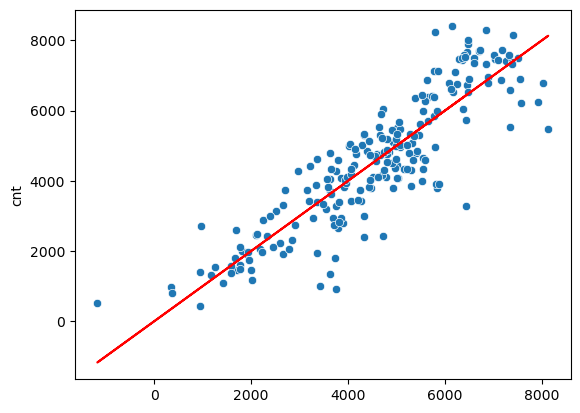

In [78]:
sns.scatterplot(x=y_pred,y=y_test)
x,y=y_pred,y_pred
plt.plot(x,y,color='red')
plt.plot()

[]

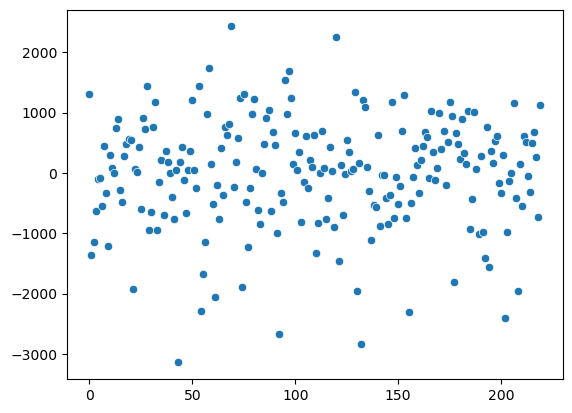

In [79]:
sns.scatterplot(x=range(len(X_test)),y=res)
plt.plot()

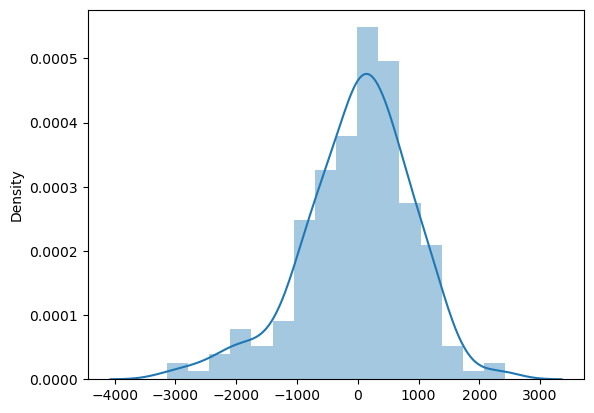

In [80]:
sns.distplot(res)
plt.show()